# Practical Machine Learning
by Sven Mayer

## 	Lecture 09: Layers

The material is licensed under the Creative Commons Attribution-Share Alike 4.0 (CC BY-SA) license: https://creativecommons.org/licenses/by-sa/4.0

In [1]:
import sys
print("Python version: ", sys.version)
import numpy as np
print("numpy version", np.__version__)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
print("matplotlib version", matplotlib.__version__)
import tensorflow as tf
print("TF:", tf.__version__)

import pandas as pd

Python version:  3.9.1 (default, Jan  8 2021, 17:17:17) 
[Clang 12.0.0 (clang-1200.0.32.28)]
numpy version 1.19.5
matplotlib version 3.3.3
INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
TF: 2.5.0-rc0


In [2]:
# load dataset 
df = pd.read_pickle("./dataKnckleTouch/knuckletouch_only3ps.pkl")

input_size = df.Blob1D.iloc[0].shape[0]
output_size = len(df.Label.iloc[0])
print(input_size, output_size)
df = df.reset_index(drop=True)
df.head()

400 2


Blob1D   Label  userID
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 1]       1
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 1]       1
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 1]       1
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 1]       1
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [0, 1]       1

# CNN

In [3]:
import scipy
import scipy.signal

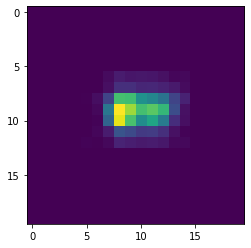

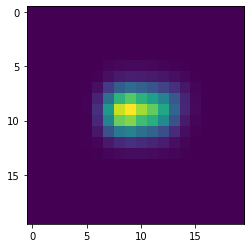

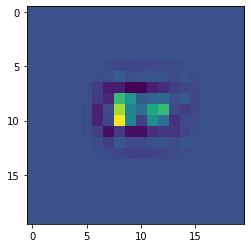

In [4]:
e = df.iloc[3400]
img = e.Blob1D.reshape((20,20))
plt.imshow(img)
plt.yticks([0,5,10,15])
plt.savefig("./figures/09_conv_input.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

f = [[0.5,0.5,0.5], [0.5,1,0.5], [0.5,0.5,0.5]]
c = scipy.signal.convolve2d(img,f, 'same')
plt.imshow(c)
plt.yticks([0,5,10,15])
plt.savefig("./figures/09_conv_cnn_1.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

f = [[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]
c = scipy.signal.convolve2d(img,f, 'same')
plt.imshow(c)
plt.yticks([0,5,10,15])
plt.savefig("./figures/09_conv_cnn_2.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

# MaxPooling

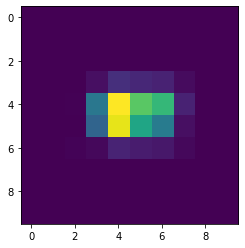

In [5]:
import skimage.measure

m = skimage.measure.block_reduce(img, (2,2), np.max)
plt.imshow(m)
plt.savefig("./figures/09_maxpooling.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Batch Norm

In [6]:
import sklearn
import sklearn.datasets

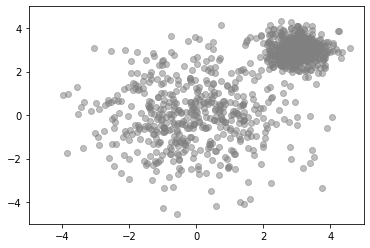

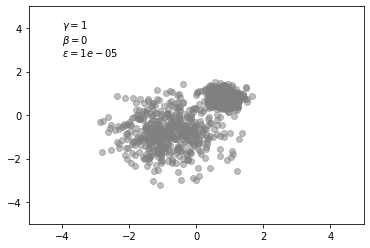

In [7]:
number_of_samples = [500, 500]
centers = [[0.0, 0.0], [3.0, 3.0]]
clusters_std = [1.5, 0.5]
x, y = sklearn.datasets.make_blobs(n_samples=number_of_samples, centers=centers,
                                   cluster_std=clusters_std, shuffle=True,
                                   random_state=0)

fig, ax = plt.subplots()
plt.scatter(x[:, 0], x[:, 1], c="gray", alpha=0.5)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.savefig("./figures/09_batch_norm.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

eps = .00001
gamma = 1
beta = 0

x_mean = np.mean(x, axis=0)
x_var = np.var(x, axis=0)

# Normalization followed by Affine transformation
x_normalized = (x - x_mean)/np.sqrt(x_var + eps)
out = gamma*x_normalized + beta

fig, ax = plt.subplots()
plt.scatter(out[:, 0], out[:, 1], c="gray", alpha=0.5)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.text(-4, 4, f"$\gamma = {gamma}$")
plt.text(-4, 3.3, f"$\\beta = {beta}$")
plt.text(-4, 2.7, f"$\epsilon = {eps}$")
plt.savefig("./figures/09_batch_norm_normed.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()